 # LetsGrowMore VIP Programme
 ## Data Science Internship
 ### 02 Intermediate Level Task - Prediction Using Decision Tree Algorithm

## Data Collection and Loading

In [51]:
# Importing the required dependencies or libraries
import os
import math
import graphviz
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
pyo.init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [52]:
# Importing and reading the Iris.csv dataset
iris_data = pd.read_csv('./Data/Iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Analysis

In [53]:
# Displaying the first 10 rows of the dataset
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [54]:
# Displaying the last 10 rows of the dataset
iris_data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [55]:
# Get basic understanding of the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [56]:
# Remove the 'Id' column from the dataset as its irrelavent for further analysis
# Renaming the columns for convenience
iris_data.drop(['Id'], axis=1, inplace=True)
iris_data.rename(
    columns={
        'SepalLengthCm': 'SepalLength',
        'SepalWidthCm': 'SepalWidth',
        'PetalLengthCm': 'PetalLength',
        'PetalWidthCm': 'PetalWidth'
    }, inplace=True)
iris_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [57]:
# No. of rows and columns respectively in the dataset
iris_data.shape

(150, 5)

In [58]:
# Checks whether the dataset contains any missing values or not
# 0 - Doesn't contain missing values
# 0 < - Contains missing values
iris_data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [59]:
# Checks whether the dataset contains any NaN values or not
# 0 - Doesn't contain NaN values
# 0 < - Contains NaN values
iris_data.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [60]:
# Displays the various statistical measures of the dataset
iris_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [61]:
# Displays the number of unique data for each column of the dataframe
iris_data.nunique()

SepalLength    35
SepalWidth     23
PetalLength    43
PetalWidth     22
Species         3
dtype: int64

In [62]:
# Displaying the elements of the 'Species' column
# Alternatively, "iris_data['Species']" can also be used
iris_data['Species'].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [63]:
# Displaying the unique elements of the 'Species' column
print(iris_data['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [64]:
# Displaying the number of values for each element of the 'Species' column
iris_data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [65]:
# Displaying the number of unique elements of the 'Species' column
iris_data['Species'].nunique()

3

In [66]:
# Maximum values in each columns (will skip NA values and won't include non-numeric values)
iris_data.max(skipna=True, numeric_only=True)

SepalLength    7.9
SepalWidth     4.4
PetalLength    6.9
PetalWidth     2.5
dtype: float64

In [67]:
# Minimum values in each columns (will skip NA values and won't include non-numeric values)
iris_data.min(skipna=True, numeric_only=True)

SepalLength    4.3
SepalWidth     2.0
PetalLength    1.0
PetalWidth     0.1
dtype: float64

In [68]:
# For future references
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Visualization

In [69]:
# Set standard Seaborn theme globally
sns.set_theme()

In [70]:
# Set 'husl' color palette globally
sns.set_palette('husl')

<AxesSubplot:xlabel='Species', ylabel='PetalWidth'>

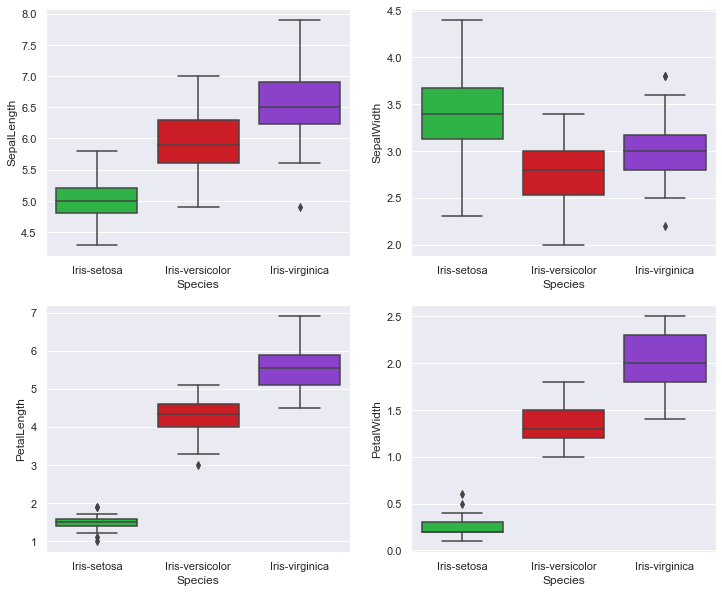

In [71]:
# getting insights of the data using Boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], data=iris_data, x='Species', y='SepalLength', palette=sns.color_palette('bright')[2:5])
sns.boxplot(ax=axes[0, 1], data=iris_data, x='Species', y='SepalWidth', palette=sns.color_palette('bright')[2:5])
sns.boxplot(ax=axes[1, 0], data=iris_data, x='Species', y='PetalLength', palette=sns.color_palette('bright')[2:5])
sns.boxplot(ax=axes[1, 1], data=iris_data, x='Species', y='PetalWidth', palette=sns.color_palette('bright')[2:5])

<AxesSubplot:xlabel='PetalWidth', ylabel='Density'>

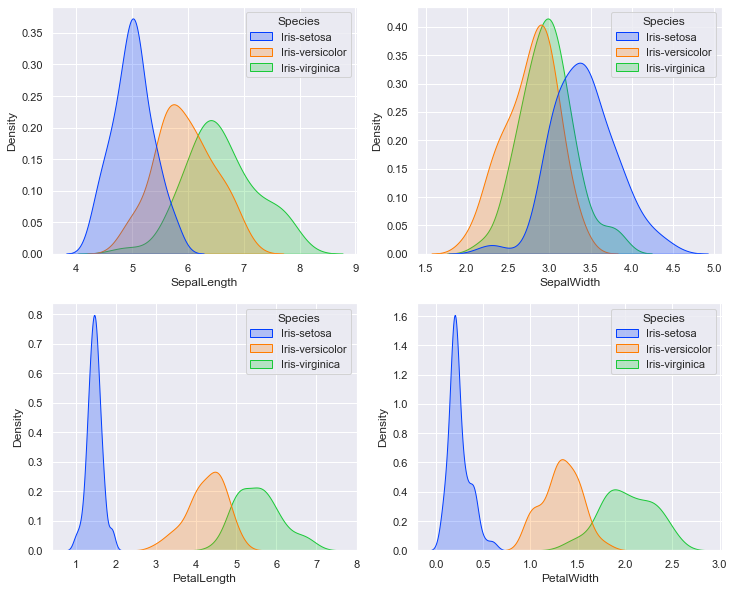

In [72]:
# getting insights of the data using KDEplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.kdeplot(ax=axes[0, 0], data=iris_data, x='SepalLength', hue='Species', fill=True, palette=sns.color_palette('bright')[:3])
sns.kdeplot(ax=axes[0, 1], data=iris_data, x='SepalWidth', hue='Species', fill=True, palette=sns.color_palette('bright')[:3])
sns.kdeplot(ax=axes[1, 0], data=iris_data, x='PetalLength', hue='Species', fill=True, palette=sns.color_palette('bright')[:3])
sns.kdeplot(ax=axes[1, 1], data=iris_data, x='PetalWidth', hue='Species', fill=True, palette=sns.color_palette('bright')[:3])

In [73]:
# Getting insights of the 'SepalLength' column using Scatterplot
px.scatter(iris_data, x='Species', y='SepalLength', size='SepalLength')

In [74]:
# Getting insights of the 'SepalWidth' column using Scatterplot
px.scatter(iris_data, x='Species', y='SepalWidth', size='SepalWidth')

In [75]:
# Getting insights of the 'PetalLength' column using Scatterplot
px.scatter(iris_data, x='Species', y='PetalLength', size='PetalLength')

In [76]:
# Getting insights of the 'PetalWidth' column using Scatterplot
px.scatter(iris_data, x='Species', y='PetalWidth', size='PetalWidth')

In [77]:
# Getting insights of the dataset using Scatter Matrix plot
px.scatter_matrix(iris_data, color='Species', dimensions=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',])

## Data Pre-processing

In [78]:
# Initiating one instance of LabelEncoder
le = LabelEncoder()

In [80]:
# Copying the data into 'encoded_data' for further steps to ensure that the original data remains intact
encoded_data = iris_data.copy(deep=True)
encoded_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [82]:
# Scaling and transforming the 'Species' column in numerical (integer) values for model training
encoded_data['Species'] = le.fit_transform(encoded_data['Species'])
encoded_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [83]:
# Diaplaying the elements of the updated 'Species' column
encoded_data['Species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
# Displaying the number of values for each element of the updated 'Species' column
encoded_data['Species'].value_counts(ascending=True)

0    50
1    50
2    50
Name: Species, dtype: int64

In [85]:
# Storing the features in 'x' by dropping 'Species' column and storing the targets in 'y'

# Features ---> x
# Targets ---> y

x = encoded_data.drop(columns=['Species'], axis=1)
y = encoded_data['Species']
print(x[:5])
print(y[:5])

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


## Splitting the dataset into Training & Testing data

In [86]:
# Training Data ---> x_train y_train
# Test Data ---> x_test y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=None)

In [87]:
# Checking the shape of the newly formed variables
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_train:", y_test.shape)

Shape of x_train: (112, 4)
Shape of x_test: (38, 4)
Shape of y_train: (112,)
Shape of y_train: (38,)


## Model Training

In [88]:
# Initiating the instances of all the required models
decision_tree = DecisionTreeClassifier()

In [89]:
# Training the model
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

## Model Evaluation and Accuracy

In [90]:
# Testing the model by predicting the targets for the training data
y_train_pred = decision_tree.predict(x_train)
print("The Accuracy Score of Training data is: {}%".format(
    str(round(100 * accuracy_score(y_train, y_train_pred), 3))))

The Accuracy Score of Training data is: 100.0%


In [91]:
# Testing the model by predicting the targets for the test data
y_test_pred = decision_tree.predict(x_test)
print("The Accuracy Score of Test data is: {}%".format(
    str(round(100 * accuracy_score(y_test, y_test_pred), 3))))

The Accuracy Score of Test data is: 97.368%


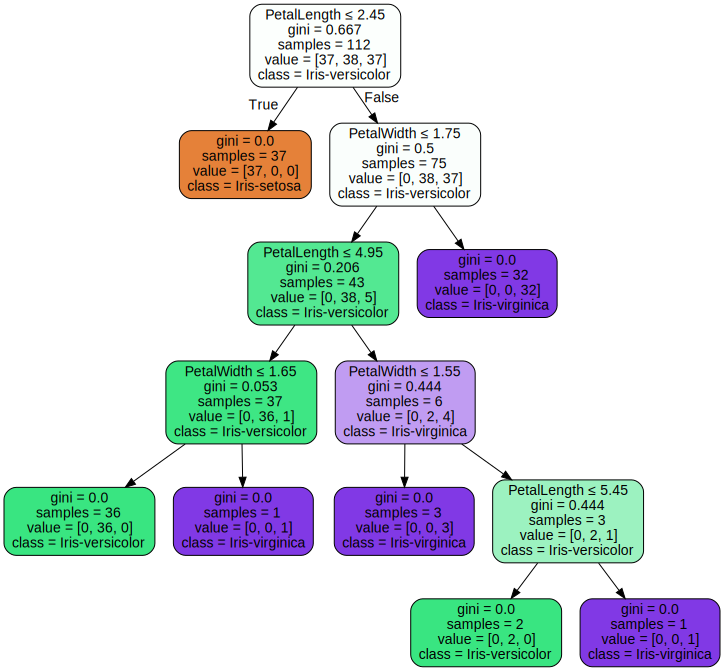

In [100]:
# Visualizing the Decision Tree for our trained model
os.environ['PATH'] += os.pathsep + (r'C:\Program Files\Graphviz\bin')

tree_graph = export_graphviz(decision_tree,
                             out_file=None,
                             feature_names=iris_data.drop(['Species'],
                                                          axis=1).keys(),
                             class_names=iris_data['Species'].unique(),
                             filled=True,
                             rounded=True,
                             special_characters=True)
graphviz.Source(tree_graph)

## Custom Inputs for Testing

In [137]:
sl = float(input("Enter the Sepal Length: "))
sw = float(input("Enter the Sepal Width: "))
pl = float(input("Enter the Petal Length: "))
pw = float(input("Enter the Petal Width: "))

Enter the Sepal Length: 6.5
Enter the Sepal Width: 3
Enter the Petal Length: 5.5
Enter the Petal Width: 1.8


In [140]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
result = decision_tree.predict([[sl, sw, pl, pw]])
if result == 0:
    print("The Predictied Species is {}.".format(species[0]))
elif result == 1:
    print("The Predictied Species is {}.".format(species[1]))
else:
    print("The Predictied Species is {}.".format(species[2]))

The Predictied Species is Iris-virginica.
